In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Credit_Risk dataset
df = pd.read_csv('Credit_Risk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Shape of our dataset
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Some statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
# Count of duplicated values
df.duplicated().sum()

0

In [8]:
# Count of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Filling missing values for each coulumns 
# I filled missing values of categoric features with their mode (with the largest number of class) 
# I filled missing values of numerical features with their median, because all of them dont distribute normally
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace = True)
df['Married'].fillna(df['Married'].value_counts().index[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0], inplace = True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Visualization

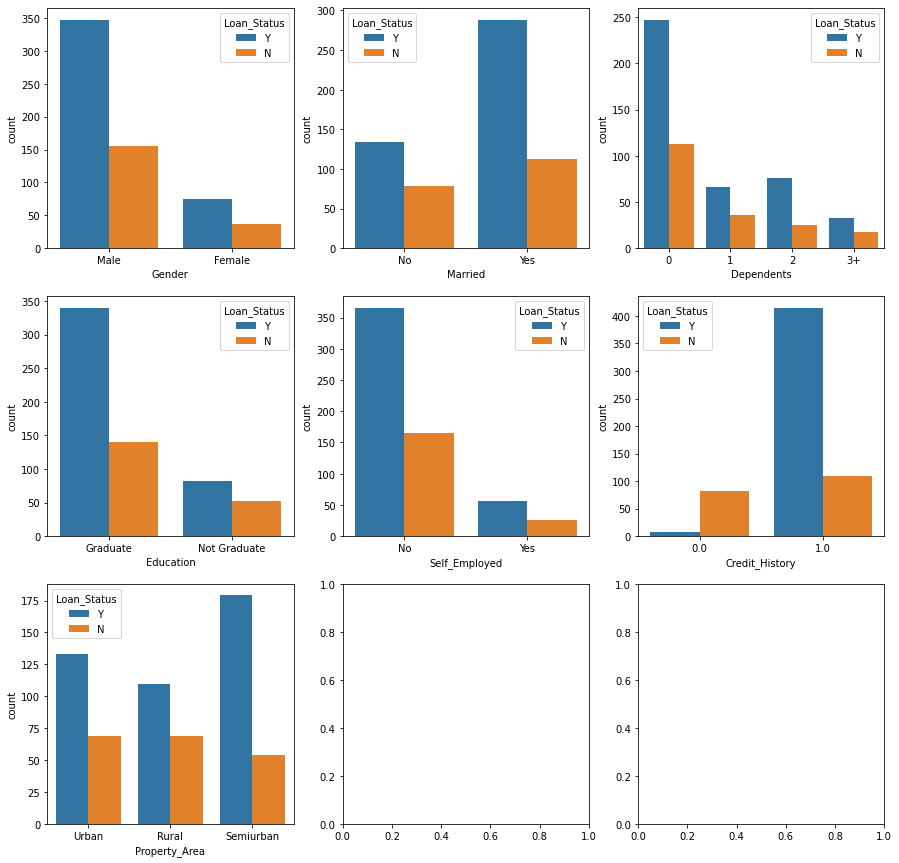

In [16]:
#On the figures below we can see the number of classes of categorical variables with considering Loan_Status
fig, ax =plt.subplots(3,3, figsize = (15,15))
sns.countplot(df['Gender'], hue = df['Loan_Status'], ax=ax[0,0])
sns.countplot(df['Married'], hue = df['Loan_Status'], ax=ax[0,1])
sns.countplot(df['Dependents'], hue = df['Loan_Status'], ax=ax[0,2])
sns.countplot(df['Education'], hue = df['Loan_Status'], ax=ax[1,0])
sns.countplot(df['Self_Employed'], hue = df['Loan_Status'], ax=ax[1,1])
sns.countplot(df['Credit_History'], hue = df['Loan_Status'], ax=ax[1,2])
sns.countplot(df['Property_Area'], hue = df['Loan_Status'], ax=ax[2,0])
fig.show()

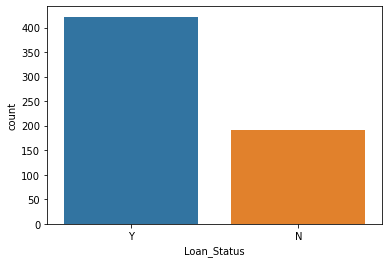

In [17]:
# Counts of classes of Loan_Status. It is clear that Y (who can get loan) is almost two times larger than N (who can not get loan)
sns.countplot(df['Loan_Status']);

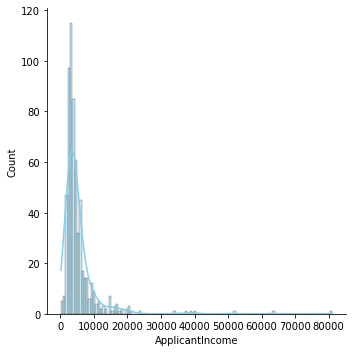

In [18]:
# On the figures below, we can see distributions of ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term respectively
# It is clear that distributions of these features are not normal.
sns.displot(data = df, x = 'ApplicantIncome', kde = True, color = 'skyblue');

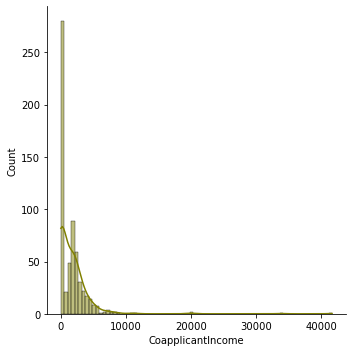

In [19]:
sns.displot(data = df, x = 'CoapplicantIncome', kde = True, color = 'olive');

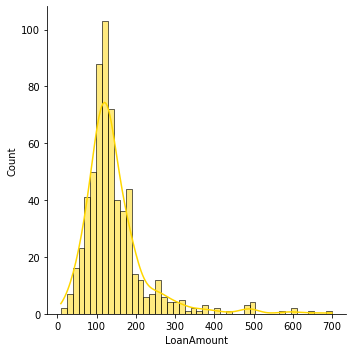

In [20]:
sns.displot(data = df, x = 'LoanAmount', kde = True, color = 'gold');

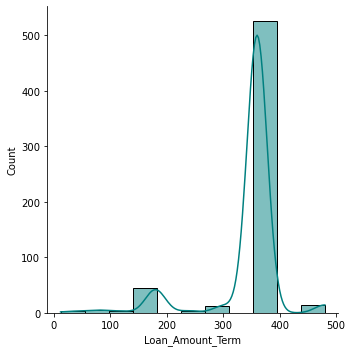

In [21]:
sns.displot(data = df, x = 'Loan_Amount_Term', kde = True, color = 'teal');

### Outlier detection and treatment with BoxPLot method

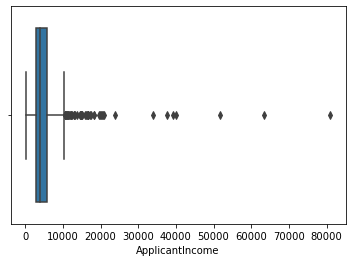

In [22]:
# For ApplicantIncome
sns.boxplot(df['ApplicantIncome']);

In [23]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3-Q1
print("Q1 ", Q1)
print("Q3 ", Q3)
print("IQR ", IQR)

Q1  2877.5
Q3  5795.0
IQR  2917.5


In [24]:
down = Q1 - 1.5*IQR
up = Q3 + 1.5*IQR
print("Down: ", down)
print("Up: ", up)

Down:  -1498.75
Up:  10171.25


In [25]:
outliers = df['ApplicantIncome']>up
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: ApplicantIncome, Length: 614, dtype: bool

In [26]:
df[outliers].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [27]:
df.loc[df[outliers].index, 'ApplicantIncome'] = up

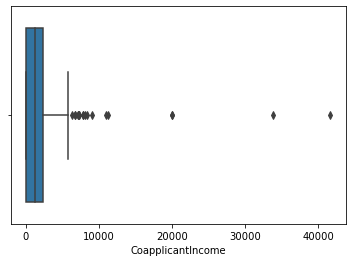

In [28]:
# For CoapplicantIncome
sns.boxplot(df['CoapplicantIncome']);

In [29]:
Q1_CI = df['CoapplicantIncome'].quantile(0.25)
Q3_CI = df['CoapplicantIncome'].quantile(0.75)
IQR_CI = Q3_CI-Q1_CI
print("Q1_CI ", Q1_CI)
print("Q3_CI ", Q3_CI)
print("IQR ", IQR_CI)

Q1_CI  0.0
Q3_CI  2297.25
IQR  2297.25


In [30]:
down_CI = Q1_CI - 1.5*IQR_CI
up_CI = Q3_CI + 1.5*IQR_CI
print("Down: ", down_CI)
print("Up: ", up_CI)

Down:  -3445.875
Up:  5743.125


In [31]:
outliers_CI = df['CoapplicantIncome']>up_CI
outliers_CI

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [32]:
df[outliers_CI].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

In [33]:
df.loc[df[outliers_CI].index, 'CoapplicantIncome'] = up_CI

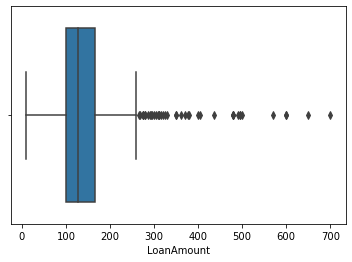

In [34]:
# For LoanAmount
sns.boxplot(df['LoanAmount']);

In [35]:
Q1_LA = df['LoanAmount'].quantile(0.25)
Q3_LA = df['LoanAmount'].quantile(0.75)
IQR_LA = Q3_LA-Q1_LA
print("Q1_LA ", Q1_LA)
print("Q3_LA ", Q3_LA)
print("IQR_LA ", IQR_LA)

Q1_LA  100.25
Q3_LA  164.75
IQR_LA  64.5


In [36]:
down_LA = Q1_LA - 1.5*IQR_LA
up_LA = Q3_LA + 1.5*IQR_LA
print("Down: ", down_LA)
print("Up: ", up_LA)

Down:  3.5
Up:  261.5


In [37]:
outliers_LA = df['LoanAmount']>up_LA
outliers_LA

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: LoanAmount, Length: 614, dtype: bool

In [38]:
df[outliers_LA].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [39]:
df.loc[df[outliers_LA].index, 'LoanAmount'] = up_LA

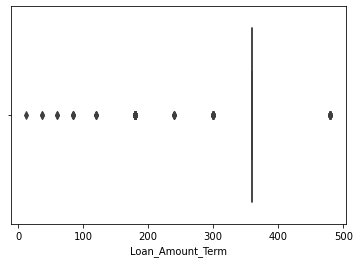

In [40]:
# For Loan_Amount_Term
sns.boxplot(df['Loan_Amount_Term']);

In [41]:
Q1_LAT = df['Loan_Amount_Term'].quantile(0.25)
Q3_LAT = df['Loan_Amount_Term'].quantile(0.75)
IQR_LAT = Q3_LAT-Q1_LAT
print("Q1_LAT ", Q1_LAT)
print("Q3_LAT ", Q3_LAT)
print("IQR_LAT ", IQR_LAT)

Q1_LAT  360.0
Q3_LAT  360.0
IQR_LAT  0.0


In [42]:
down_LAT = Q1_LAT - 1.5*IQR_LAT
up_LAT = Q3_LAT + 1.5*IQR_LAT
print("Down: ", down_LAT)
print("Up: ", up_LAT)

Down:  360.0
Up:  360.0


In [43]:
outliers_LAT = (df['Loan_Amount_Term'] < down_LAT) | (df['Loan_Amount_Term'] > up_LAT) 
outliers_LAT

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610     True
611    False
612    False
613    False
Name: Loan_Amount_Term, Length: 614, dtype: bool

In [44]:
df[outliers_LAT].index

Int64Index([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100,
            109, 115, 128, 130, 133, 142, 144, 155, 164, 168, 171, 172, 179,
            182, 186, 189, 202, 228, 231, 241, 242, 245, 247, 248, 253, 262,
            282, 286, 293, 298, 313, 315, 333, 334, 355, 358, 363, 366, 372,
            373, 375, 378, 385, 393, 400, 401, 408, 429, 435, 444, 451, 453,
            461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539, 540, 546,
            554, 573, 575, 585, 590, 591, 593, 600, 605, 610],
           dtype='int64')

In [45]:
df.loc[df[outliers_LAT].index, 'Loan_Amount_Term'] = up_LAT

### One-Hot Encoding

In [47]:
df = pd.get_dummies(df, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [48]:
df.head()

,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Y,0,1,1,0,1,0,0,0
1,N,0,1,0,1,0,1,0,0
2,Y,0,1,0,1,1,0,0,0
3,Y,0,1,0,1,1,0,0,0
4,Y,0,1,1,0,1,0,0,0


In [49]:
# After encoding delete some columns beacues they include the same information with their pair
df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No'], axis = 1, inplace = True)

In [50]:
# Creidy_History column is in float type and we must change it
df['Credit_History'] = df['Credit_History'].replace({1.0: 'Yes', 0.0: 'No'})

In [51]:
df = pd.get_dummies(df, columns = ['Credit_History'])
df.drop('Credit_History_No', axis = 1, inplace = True)

In [52]:
# Preparation of our tagret 'Loan_Status'. I replaced Y with 1 and N with 0
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [53]:
df.reset_index(inplace = True)
df.head()

,index,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Yes
0,0,LP001002,5849.0,0.0,128.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1
1,1,LP001003,4583.0,1508.0,128.0,360.0,0,1,1,0,1,0,0,1,0,1,0,0,1
2,2,LP001005,3000.0,0.0,66.0,360.0,1,1,1,1,0,0,0,1,1,0,0,1,1
3,3,LP001006,2583.0,2358.0,120.0,360.0,1,1,1,1,0,0,0,0,0,0,0,1,1
4,4,LP001008,6000.0,0.0,141.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1


In [54]:
# I deleted index and Loan_ID columns because Loand_ID is just number which identify loans and it is not informative for models
df.drop(['index', 'Loan_ID'], axis = 1, inplace = True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Yes
0,5849.0,0.0,128.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,0,1,1,0,1,0,0,1,0,1,0,0,1
2,3000.0,0.0,66.0,360.0,1,1,1,1,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.0,360.0,1,1,1,1,0,0,0,0,0,0,0,1,1
4,6000.0,0.0,141.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1


In [55]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Yes
0,5849.0,0.0,128.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,0,1,1,0,1,0,0,1,0,1,0,0,1
2,3000.0,0.0,66.0,360.0,1,1,1,1,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.0,360.0,1,1,1,1,0,0,0,0,0,0,0,1,1
4,6000.0,0.0,141.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1


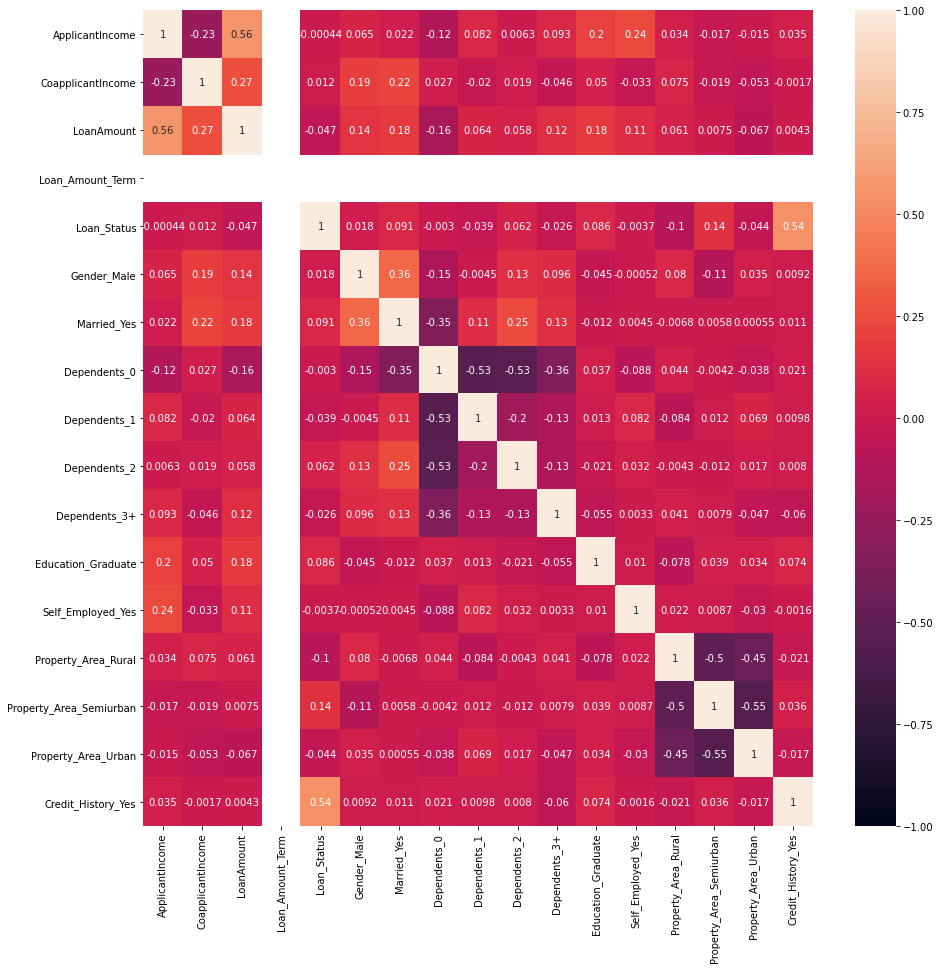

In [56]:
# In this heatmap, we can see correlation between features. Loan_Amount dont have correlation with other features
#because its all values were equal to 360 after filling missing values and outlier treatment steps

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cbar = True, vmin = -1, vmax= 1);

In [57]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_Yes
0,5849.0,0.0,128.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,0,1,1,0,1,0,0,1,0,1,0,0,1
2,3000.0,0.0,66.0,360.0,1,1,1,1,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.0,360.0,1,1,1,1,0,0,0,0,0,0,0,1,1
4,6000.0,0.0,141.0,360.0,1,1,0,1,0,0,0,1,0,0,0,1,1


In [58]:
# Definition our independed features (X) and depended feature (Target - y)
X = df.drop('Loan_Status', axis = 1)
y = df[['Loan_Status']]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (614, 16)
y shape:  (614, 1)


In [59]:
# This method rescales the data so that the mean is 0 and the standard deviation is 1.
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 0.49716393, -0.87458735, -0.16804076, ..., -0.7820157 ,
         1.42814704,  0.41173269],
       [-0.0137667 ,  0.05439458, -0.16804076, ..., -0.7820157 ,
        -0.70020801,  0.41173269],
       [-0.65263178, -0.87458735, -1.28046152, ..., -0.7820157 ,
         1.42814704,  0.41173269],
       ...,
       [ 1.39431937, -0.72673876,  2.07474303, ..., -0.7820157 ,
         1.42814704,  0.41173269],
       [ 1.19696939, -0.87458735,  0.89055319, ..., -0.7820157 ,
         1.42814704,  0.41173269],
       [-0.0137667 , -0.87458735, -0.07832941, ...,  1.2787467 ,
        -0.70020801, -2.42876026]])

In [108]:
# Train Test Split. Mostly test size is selected as 0.30 in most problems but in our problem, the dataset is not big enough. 
# For this reason I have used 20% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.20, random_state = 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (491, 16)
Shape of X_test:  (123, 16)
Shape of y_train:  (491, 1)
Shape of y_test:  (123, 1)


## Prediction Step

In [152]:
models = [ LogisticRegression,
          GradientBoostingClassifier,
          RandomForestClassifier,
          DecisionTreeClassifier,
          KNeighborsClassifier,
          SVC,
          LGBMClassifier]

In [153]:
def MakePrediction(algorithm):
    model = algorithm().fit(X_train, y_train)
    print(algorithm.__name__, " Train Score: ", model.score(X_train, y_train))
    print(algorithm.__name__, " Test Score: ", model.score(X_test, y_test))
    print("_______________________________________________________________")

In [154]:

for i in models:
    MakePrediction(i)

GradientBoostingClassifier  Train Score:  0.8920570264765784
GradientBoostingClassifier  Test Score:  0.7723577235772358
_______________________________________________________________
RandomForestClassifier  Train Score:  0.9979633401221996
RandomForestClassifier  Test Score:  0.7723577235772358
_______________________________________________________________
DecisionTreeClassifier  Train Score:  0.9979633401221996
DecisionTreeClassifier  Test Score:  0.7235772357723578
_______________________________________________________________
KNeighborsClassifier  Train Score:  0.8167006109979633
KNeighborsClassifier  Test Score:  0.7073170731707317
_______________________________________________________________
SVC  Train Score:  0.8187372708757638
SVC  Test Score:  0.7886178861788617
_______________________________________________________________
LGBMClassifier  Train Score:  0.9816700610997964
LGBMClassifier  Test Score:  0.8048780487804879
____________________________________________________

### Tuning of Models (Hyperparameter tuning)

### LogisticRegression

In [112]:
lr_model = LogisticRegression().fit(X_train, y_train)

In [113]:
cross_val_score(lr_model, X_train, y_train, cv = 5).mean()

0.8064316635745208

In [114]:
val_lr = cross_val_score(lr_model, X_test, y_test, cv = 5).mean()
val_lr

0.7333333333333333

### Gradien Boosting 

In [121]:
gbm_model = GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [3,5,10],
              "min_samples_split": [2, 5, 10]}

gmb_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [122]:
gmb_cv_model.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [123]:
tuned_gbm = GradientBoostingClassifier(learning_rate = 0.001,
                                       n_estimators = 500,
                                       max_depth = 3,
                                       min_samples_split = 2).fit(X_train, y_train)

In [124]:
print("Train Score: ", tuned_gbm.score(X_train, y_train))
print("Test Score: ", tuned_gbm.score(X_test, y_test))

Train Score:  0.8167006109979633
Test Score:  0.7479674796747967


### Random Forest 

In [125]:
rf_model = RandomForestClassifier()
rf_params = {"max_depth": [2, 5, 8, 10],
             "n_estimators": [100, 500, 1000],
             "max_features": [2,5,8],
             "min_samples_split": [2,5,10]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [126]:
rf_cv_model.best_params_

{'max_depth': 2,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [127]:
rf_tuned = RandomForestClassifier(max_depth = 2,
                                  n_estimators = 100,
                                  max_features = 5,
                                  min_samples_split = 2).fit(X_train, y_train)

In [128]:
print("Train Score: ", rf_tuned.score(X_train, y_train))
print("Test Score: ", rf_tuned.score(X_test, y_test))

Train Score:  0.814663951120163
Test Score:  0.7886178861788617


### DecisionTree

In [129]:
dt_model = DecisionTreeClassifier()
dt_params = {"max_depth": list(range(1,10)),
             "min_samples_split": list(range(2,50)),
             "max_features": [2, 5, 7, 10]}

dt_cv_model = GridSearchCV(dt_model, dt_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [130]:
dt_cv_model.best_params_

{'max_depth': 9, 'max_features': 5, 'min_samples_split': 48}

In [131]:
tuned_dt = DecisionTreeClassifier(max_depth = 9, max_features = 5, min_samples_split = 48).fit(X_train, y_train)

In [132]:
print("Train Score: ", tuned_dt.score(X_train, y_train))
print("Test Score: ", tuned_dt.score(X_test, y_test))

Train Score:  0.824847250509165
Test Score:  0.7967479674796748


### KNeighbors

In [138]:
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}

knn_cv = GridSearchCV(knn_model, knn_params, cv = 5).fit(X_train, y_train)

In [139]:
knn_cv.best_params_

{'n_neighbors': 10}

In [140]:
tuned_knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

In [141]:
print("Train Score: ", tuned_knn.score(X_train, y_train))
print("Test Score: ", tuned_knn.score(X_test, y_test))

Train Score:  0.8044806517311609
Test Score:  0.6991869918699187


### SVC 

In [142]:
svm_model = SVC()
svm_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}
svm_cv_model = GridSearchCV(svm_model, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [143]:
svm_cv_model.best_params_

{'C': 1, 'kernel': 'linear'}

In [144]:
tuned_svm = SVC(C = 1, kernel = 'linear').fit(X_train, y_train)

In [145]:
print("Train Score: ", tuned_svm.score(X_train, y_train))
print("Test Score: ", tuned_svm.score(X_test, y_test))

Train Score:  0.814663951120163
Test Score:  0.7886178861788617


###  LGBMClassifier

In [115]:
lgbm_model =  LGBMClassifier()
lgbm_params = {"n_estimators": [100,300, 500, 1000, 2000],
              "subsample": [0.6, 0.8, 1],
              "max_depth": [3, 4, 5, 6],
              "learning_rate": [0.1,0.001, 0.01, 0.02, 0.05],
              "min_child_samples": [5, 10, 20]}

lgbm_cv = GridSearchCV(lgbm_model, lgbm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [116]:
lgbm_cv.best_params_

{'learning_rate': 0.001,
 'max_depth': 6,
 'min_child_samples': 10,
 'n_estimators': 1000,
 'subsample': 0.6}

In [117]:
tuned_lgbm = LGBMClassifier(n_estimators = 1000,
                            subsample = 0.6,
                            max_depth = 6,
                            learning_rate = 0.001,
                            min_child_samples = 10).fit(X_train, y_train) 

In [118]:
print("Train Score: ", tuned_lgbm.score(X_train, y_train))
print("Test Score: ", tuned_lgbm.score(X_test, y_test))

Train Score:  0.824847250509165
Test Score:  0.7723577235772358


### Comparision of Tuned Models

In [155]:
tuned_models = ["Validated Logistic Regression",
                "Tuned Gradient Boosting",
                "Tuned Random Forest",
                "Tuned Decision Tree",
                "Tuned KNN", 
                "Tuned SVM", 
                "Tuned LightGBM"] 

test_scores = [val_lr,
               tuned_gbm.score(X_test, y_test),
               rf_tuned.score(X_test, y_test),
               tuned_dt.score(X_test, y_test),
               tuned_knn.score(X_test, y_test),
               tuned_svm.score(X_test, y_test),
               tuned_lgbm.score(X_test, y_test)]

In [156]:
# The best accurate model is Decision Tree for this dataset
tuned_results = pd.DataFrame(test_scores, columns = ["Test Score"], index = tuned_models)
tuned_results.sort_values(by = 'Test Score', ascending = False)

,Test Score
Tuned Decision Tree,0.796748
Tuned Random Forest,0.788618
Tuned SVM,0.788618
Tuned LightGBM,0.772358
Tuned Gradient Boosting,0.747967
Validated Logistic Regression,0.733333
Tuned KNN,0.699187


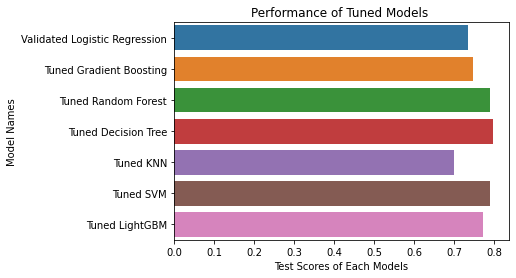

In [157]:
sns.barplot(x = tuned_results["Test Score"], y = tuned_results.index);

plt.xlabel("Test Scores of Each Models")
plt.ylabel("Model Names")
plt.title("Performance of Tuned Models ")
plt.show()

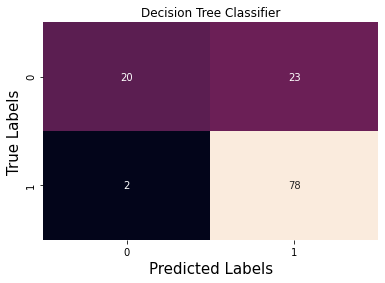

In [164]:
# As we can see the best result belongs to Decision Tree with 0.796748 accuracy score  after hyperparameter tunning.
# Also we can improve our results expanding dataset.
# In the Loan_Status, the number of 'No' values is very little, for this reason our models can not learn characteristics of this values very well.
# I think in this way our models can not classify 'No' values with high accuracy

cm = confusion_matrix(y_test, tuned_dt.predict(X_test))
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'g');
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Decision Tree Classifier')
plt.show()

In [160]:
print(classification_report(y_test, tuned_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.77      0.97      0.86        80

    accuracy                           0.80       123
   macro avg       0.84      0.72      0.74       123
weighted avg       0.82      0.80      0.78       123



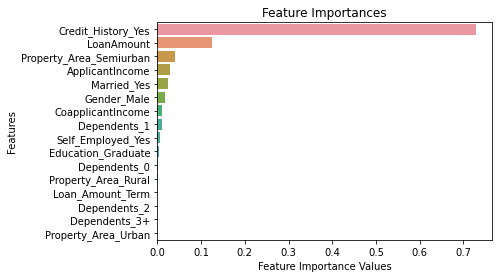

In [165]:
# Also we can see the most informative feature is Credit_History_Yes for Decision Tree Classifier
importances = pd.Series(tuned_dt.feature_importances_,
                            index = X.columns).sort_values(ascending = False)

sns.barplot(x = importances, y = importances.index)
plt.xlabel("Feature Importance Values")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()